### Todo
- Expand according to basis functions
- Compare discrete fourier transformation with autocorrelation
- Study accuracy as function of number of datapoints 

###  The basic idea
- Assume we have a signal and we would like to find its periodic components
- There can be of course several such components.
- Here we are interested in the most dominant periodic components. 
- The method of choice is a **discrete Fourier Transformation**.

### Discrete Fourier Transformation
- Assume a sequence of $N$ numbers $\{y_0, \dots, y_{N-1}\}$ associated with $N$ even-spaced time steps, 
- $\{t_0, \dots, t_{N-1}\} = t_0 + \frac{T}{N}n, ~  n = 0, \dots N-1$ 
- $T =  t_{N-1} - t_0$ is called period. Indeed the DFT assumes that the give sequence of numbers is repeated.

In [1]:
from dataclasses import dataclass
from numpy import ndarray

@dataclass
class DFT:
    abs_fourier: float
    frequencies: str

        
def abs_discrete_fourier(ys: ndarray): 
    N = ys.size
    abs_fourier = tf.abs(tf.signal.rfft(ys))
    frequencies = np.fft.fftfreq(ys.size, d=1)[:N//2+1]
    return DFT(abs_fourier=abs_fourier, frequencies=frequencies)

In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

def f(x):
    return np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)



def plot_f(xs, ys):
    fig, ax = plt.subplots(figsize=(14,4))
    ax.plot(xs, ys, "o--" , color="black", mfc="white")
    ax.set_xlabel(r"$t$", fontsize=15)
    ax.set_ylabel(r"$f(t)$", fontsize=15)
    ax.grid()
    fig.show()
    

    
def plot_fft(xs, ys, xticks=None): 
    fig, ax = plt.subplots(figsize=(14,4))
    ax.plot(xs, ys, "o--" , color="black", mfc="white")
    ax.set_xlabel(r"$k$", fontsize=15)
    ax.set_ylabel(r"$f(x)$", fontsize=15)
    ax.set_xlim(0,.2)
    ax.grid()
    if xticks:
        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(xticks)
        ax2.set_xticklabels(xticks)
    fig.show()

<ipython-input-2-967fcc848163>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


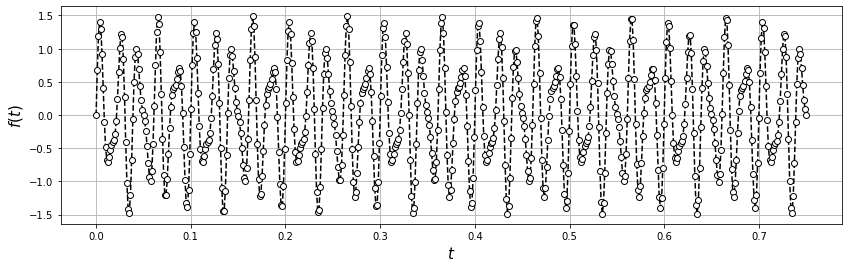

In [3]:
sampling_space = 1/800
N = 600
xs = tf.linspace(0., sampling_space * N, N)
plot_f(xs, f(xs))

<ipython-input-2-967fcc848163>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


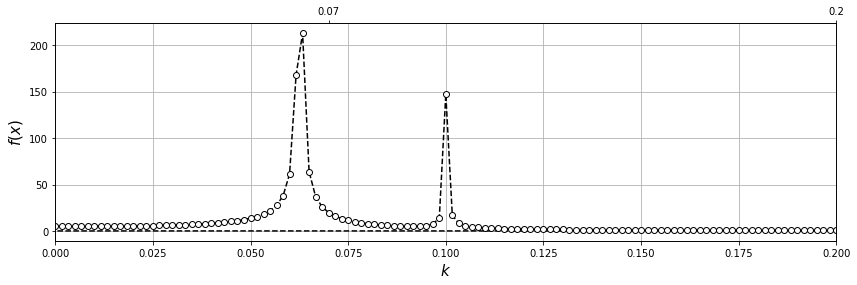

In [4]:
dft = abs_discrete_fourier(f(xs))
xticks = np.round(1 / (np.array([15, 5])), 2)
plot_fft(dft.frequencies, dft.abs_fourier, list(xticks))

In [5]:
tf.sin(2*np.pi)

<tf.Tensor: shape=(), dtype=float32, numpy=1.7484555e-07>